In [18]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pylab as plt

In [2]:
cctv = pd.read_csv('C:/Users/User/Downloads/읍면동 cctv/gd_cctv_emd.csv',encoding='cp949')

In [4]:
cctv.columns

Index(['Unnamed: 0', '읍면동', 'index', '금융갯수', '유흥갯수', '숙박갯수', '총인구', 'CCTV설치대수',
       '야간유동인구18_24', '심야유동인구24_06', '초등_여학생', '고등_여학생', '20대여성', '30대여성',
       '범죄취약계층', '중_여학생', 'CCTV설치민원', '여성총인구', '최종가중치', '범죄취약지수', '감시취약지수',
       '최종설치지수', '총주택면적', '단독주택면적', 'CCTV설치유무', '상가갯수', 'cctv_pop'],
      dtype='object')

In [32]:
#군집분석에 필요한 변수만 따로 저장
cctv = cctv[['금융갯수','유흥갯수','숙박갯수','상가갯수','총인구','CCTV설치대수','야간유동인구18_24','심야유동인구24_06','범죄취약계층','CCTV설치민원','여성총인구','범죄취약지수','감시취약지수','최종설치지수','단독주택면적','cctv_pop']]

In [9]:
#min-max 표준화

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit_transform(cctv)
feature = scaler.fit_transform(cctv)

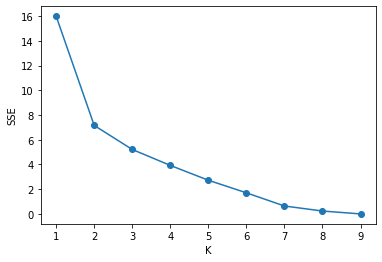

In [16]:
#적합한 K 찾기
def elbow(X):
    sse = []

    for i in range(1,10):
        km = KMeans(n_clusters=i,algorithm='auto', random_state=42)
        km.fit(X)
        sse.append(km.inertia_)

    plt.plot(range(1,10), sse, marker='o')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.show()

elbow(feature)

- k=2 가 적합한데 2그룹이면 넘 양아치같아서 3그룹으로 바꿔봄 ㅋ

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50659 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49892 missing from current

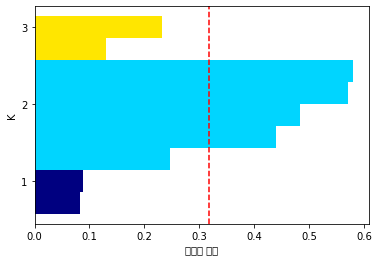

In [19]:
#실루엣 기법
from sklearn.metrics import silhouette_samples
from sklearn.datasets import make_blobs
from matplotlib import cm

def plotSilhouette(X, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)

        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
                edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)

    silhoutte_avg = np.mean(silhouette_vals)
    plt.axvline(silhoutte_avg, color = 'red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('K')
    plt.xlabel('실루엣 계수')
    plt.show()

k= 3

X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5,
                  shuffle=True, random_state=0)
km = KMeans(n_clusters=k, algorithm='auto', random_state=42)
y_km = km.fit_predict(feature)
plotSilhouette(feature, y_km)

- 오른쪽으로만 쭊쭊뻗어있는 모양을 보아하니 군집이 잘 형성되었다는 의미

In [20]:
#Kmeans 모델 만들기
k = 3
model = KMeans(n_clusters=k,algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

In [24]:
# 결과 합치기
final_df = pd.DataFrame(np.hstack((predict, feature)))
# 컬럼명 지정
cols = list(cctv.columns.values)
cols.insert(0,'group')
final_df.columns = cols

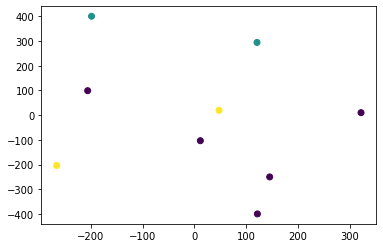

In [25]:
from sklearn.manifold import TSNE
feature_df = pd.DataFrame(feature)

#차원축소
transformed = TSNE(n_components=3).fit_transform(feature_df)
transformed.shape

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys, c=final_df['group'])  #라벨은 색상으로 분류됨

plt.show()

- 동이 9개밖에 없긴해서 좀 많이 그켬이긴한데 그래도 군집이 잘 형성되었음을 보임

In [27]:
#그룹확인
predict

,predict
0,0
1,0
2,2
3,0
4,0
5,0
6,2
7,1
8,1


In [28]:
predict.to_csv('C:/Users/User/Downloads/읍면동 cctv/군집.csv')

- 군집된거랑 cctv 데이터랑 합치기 (엑셀에서)

- 군집까지 옆에 붙여서 데이터 불러오기

In [42]:
cctv = pd.read_csv('C:/Users/User/Downloads/읍면동 cctv/gd_cctv_emd.csv',encoding='cp949')

In [43]:
#군집이 잘 붙은걸 확인(맨오른쪽에 군집 변수 있음 ㅇㅇ)
cctv.head()

,Unnamed: 0,읍면동,index,금융갯수,유흥갯수,숙박갯수,총인구,CCTV설치대수,야간유동인구18_24,심야유동인구24_06,...,최종가중치,범죄취약지수,감시취약지수,최종설치지수,총주택면적,단독주택면적,CCTV설치유무,상가갯수,cctv_pop,군집
0,0,강일동,478768,2,2,2,23410,37,51301,3387,...,285.768,54.21,44.159,103.684,152489.30,7025.61,18,6,0.001581,0
1,1,고덕동,612963,1,18,5,36785,161,92739,4813,...,424.479,67.32,376.496,472.569,305649.32,109275.09,62,24,0.004377,0
2,2,길동,203085,11,165,43,51048,210,86824,12519,...,183.723,133.10,632.020,815.428,459196.98,51930.65,81,219,0.004114,2
3,3,둔촌동,409734,9,32,2,27170,121,92816,4328,...,275.712,83.94,363.288,478.100,356920.64,37084.10,52,43,0.004453,0
4,4,명일동,274187,16,59,6,44885,137,96359,6135,...,207.862,87.57,411.455,527.496,315538.23,31481.53,60,81,0.003052,0


### 이 데이터 cctv.csv 는 qgis에서 부른다음, 강동구 동shp 파일이랑 조인시킨다음에 단계구분도를 '군집'으로 해서 (ex.빨,초,파) 그리면 지도상으로 어떤 동이 어떤 그룹인지 알 수 있음

In [44]:
#군집분석에 필요한 변수만 저장
cctv = cctv[['금융갯수','유흥갯수','숙박갯수','상가갯수','총인구','CCTV설치대수','야간유동인구18_24','심야유동인구24_06','범죄취약계층','CCTV설치민원','여성총인구','범죄취약지수','감시취약지수','최종설치지수','단독주택면적','cctv_pop','군집']]

In [47]:
#군집별로 그룹화
gd_cctv = cctv.groupby('군집').sum().reset_index()

In [48]:
gd_cctv.head()

,군집,금융갯수,유흥갯수,숙박갯수,상가갯수,총인구,CCTV설치대수,야간유동인구18_24,심야유동인구24_06,범죄취약계층,CCTV설치민원,여성총인구,범죄취약지수,감시취약지수,최종설치지수,단독주택면적,cctv_pop
0,0,34,119,19,172,150384,553,412070,25877,28879,4.0,75724,353.74,1358.179,1815.542,210026.74,0.018812
1,1,13,239,61,313,153488,643,212049,7621,28169,5.5,77384,168.47,1433.597,1714.036,318780.24,0.008303
2,2,27,376,59,462,120119,459,242143,28368,22684,4.0,61022,260.60,1503.126,1885.194,154855.03,0.007719


- 금융 : 0 > 2 > 1
- 유흥 : 2 > 0 > 1
- 숙박 : 1 > 2 > 0 
- ... 이런식으로 어떤 군집이 어떤 특성을 가지는지 알 수 있음.

- gd_cctv 데이터는 다시 csv로 저장한 뒤, 엑셀안에서 군집별로 그래프 그릴 수 있음(시각화)
